# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nanda Arya Putra
- **Email:** nandaarya404@gmail.com
- **ID Dicoding:** Nanda Arya Putra

## Menentukan Pertanyaan Bisnis

1. Pada hari apa saja terjadi penyewaan sepeda tertinggi dan terendah ?
2. Pada jam berapa saja terjadi penyewaan sepeda tertinggi dan terendah ?
3. Pada bulan apa saja terjadi penyewaan sepeda tertinggi dan terendah ?
4. Pada kondisi cuaca apa saja terjadi penyewaan sepeda tertinggi dan terendah ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data
Get and load Bike Sharing Dataset from https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

In [2]:
# Create day dataframe
day_df = pd.read_csv("/kaggle/input/bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Berikut adalah penjelasan fungsi dari setiap kolom dalam dataframe **day_df**:

- Informasi Identitas & Waktu
    - instant → Indeks unik untuk setiap record.
    - dteday → Tanggal pencatatan data.
    - season → Musim dalam setahun (1: Spring, 2: Summer, 3: Fall, 4: Winter).
    - yr → Tahun pengambilan data (0: 2011, 1: 2012).
    - mnth → Bulan pengambilan data (1–12).
    - weekday → Hari dalam seminggu (0: Minggu, 6: Sabtu).

- Informasi Hari Khusus
    - holiday → Menandakan apakah hari tersebut libur nasional (1: Libur, 0: Tidak).
    - workingday → Menandakan apakah hari tersebut hari kerja (1: Ya, 0: Tidak, yaitu akhir pekan atau libur).

- Informasi Cuaca & Lingkungan
    - weathersit → Kondisi cuaca (1: Cerah, 2: Berkabut, 3: Hujan ringan/salju ringan, 4: Hujan/salju lebat).
    - temp → Suhu yang sudah dinormalisasi berdasarkan rentang -8°C hingga 39°C.
    - atemp → Suhu yang dirasakan (feels like) dalam skala normalisasi -16°C hingga 50°C.
    - hum → Tingkat kelembapan yang dinormalisasi (0–1).
    - windspeed → Kecepatan angin yang dinormalisasi berdasarkan nilai maksimum 67.

- Informasi Pengguna & Jumlah Penyewaan
    - casual → Jumlah pengguna yang tidak terdaftar (pengguna kasual).
    - registered → Jumlah pengguna yang terdaftar.
    - cnt → Total penyewaan sepeda (gabungan dari casual + registered).

In [3]:
# Create hour dataframe
hour_df = pd.read_csv("/kaggle/input/bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Berikut adalah penjelasan fungsi dari setiap kolom dalam dataframe **hour_df**:

- Informasi Identitas & Waktu
    - instant → Indeks unik untuk setiap record.
    - dteday → Tanggal pencatatan data.
    - season → Musim dalam setahun (1: Spring, 2: Summer, 3: Fall, 4: Winter).
    - yr → Tahun pengambilan data (0: 2011, 1: 2012).
    - mnth → Bulan pengambilan data (1–12).
    - hr → Jam pengambilan data (hanya ada di hour.csv, 0–23).
    - weekday → Hari dalam seminggu (0: Minggu, 6: Sabtu).

- Informasi Hari Khusus
    - holiday → Menandakan apakah hari tersebut libur nasional (1: Libur, 0: Tidak).
    - workingday → Menandakan apakah hari tersebut hari kerja (1: Ya, 0: Tidak, yaitu akhir pekan atau libur).

- Informasi Cuaca & Lingkungan
    - weathersit → Kondisi cuaca (1: Cerah, 2: Berkabut, 3: Hujan ringan/salju ringan, 4: Hujan/salju lebat).
    - temp → Suhu yang sudah dinormalisasi berdasarkan rentang -8°C hingga 39°C.
    - atemp → Suhu yang dirasakan (feels like) dalam skala normalisasi -16°C hingga 50°C.
    - hum → Tingkat kelembapan yang dinormalisasi (0–1).
    - windspeed → Kecepatan angin yang dinormalisasi berdasarkan nilai maksimum 67.

- Informasi Pengguna & Jumlah Penyewaan
    - casual → Jumlah pengguna yang tidak terdaftar (pengguna kasual).
    - registered → Jumlah pengguna yang terdaftar.
    - cnt → Total penyewaan sepeda (gabungan dari casual + registered).

### Assessing Data
Proses ini adalah menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

#### Memeriksa tipe data pada DataFrame day_df dan hour_df

In [4]:
print(day_df.info(), "\n")
print(hour_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data colum

**Insight:**

- day_df memiliki 731 baris, yang berarti dataset ini menyajikan data harian selama sekitar dua tahun.
- hour_df memiliki 17.379 baris, yang berarti dataset ini menyajikan data per jam untuk periode yang sama.
- Kedua dataset memiliki kolom yang mirip, tetapi hour_df memiliki tambahan kolom hr (jam), yang masuk akal karena dataset ini mencatat peminjaman sepeda dalam skala jam.
- Kolom dteday bertipe object (string), bukan tipe datetime. Disarankan untuk mengubahnya menjadi datetime64 untuk mempermudah analisis waktu.
- Sebagian besar kolom memiliki tipe int64, yang menunjukkan data kategorikal atau diskrit.
- Kolom temp, atemp, hum, dan windspeed memiliki tipe float64, yang menunjukkan data kontinu.

#### Memeriksa missing values pada DataFrame day_df dan hour_df

In [5]:
print("Jumlah missing values pada day_df: \n", day_df.isna().sum(), "\n")
print("Jumlah missing values pada hour_df", hour_df.isna().sum(), "\n")

Jumlah missing values pada day_df: 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

Jumlah missing values pada hour_df instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



**Insight:**

- Tidak ada missing values pada dataframe day_df dan hour_df

#### Memeriksa data duplicate pada DataFrame day_df dan hour_df

In [6]:
print("Jumlah duplikasi pada day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada day_df:  0
Jumlah duplikasi pada hour_df:  0


**Insight:**

- Tidak ada duplikasi data pada dataframe day_df dan hour_df

#### Memeriksa parameter statistik dari kolom numerik pada DataFrame day_df dan hour_df

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

1. Dataset Harian (day_df)
- Distribusi Penyewaan (cnt):
    - Rata-rata: 4.504 sepeda/hari, maksimum 8.714 sepeda/hari.
    - Distribusi tidak merata, terlihat dari standar deviasi yang tinggi (1.937).

- Variasi Cuaca (temp, atemp, hum, windspeed):
    - Suhu rata-rata 0.49 (skala 0-1), dengan variasi cukup lebar.
    - Kelembaban (hum) memiliki rentang luas, dari 0% hingga 97%.

- Sebaran Musim dan Bulan:
    - Data tersebar merata di semua musim (season: 1-4) dan bulan (mnth: 1-12).

2. Dataset Per Jam (hour_df)
- Distribusi Penyewaan Per Jam (cnt):
    - Rata-rata 189 sepeda/jam, tetapi maksimum mencapai 977 sepeda/jam.
    - Variasi tinggi terlihat dari standar deviasi (181).

- Tren Jam (hr):
    - Rata-rata jam 11.54, menunjukkan lebih banyak penyewaan di siang hari.

- Kondisi Cuaca (temp, hum, windspeed):
    - Suhu (temp) lebih luas rentangnya dibanding dataset harian.
    - Beberapa jam memiliki kelembaban hingga 100% dan angin sangat rendah (windspeed = 0).

- Perbedaan Penyewaan casual vs registered:
    - Penyewa terdaftar (registered) jauh lebih banyak dibanding penyewa kasual (casual).
    - Maksimum registered 886/jam, sedangkan casual hanya 367/jam.

### Cleaning Data

- Menghapus kolom instant karena tidak diperlukan
- Mengubah tipe data kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit' dari int64 menjadi category karena hanya berisi beberaba varian value saja
- Mengubah tipe data dteday dari object menjadi datetime karena lebih cocok untuk tipe data tanggal
- Mengubah nama kolom agar lebih mudah dipahami
- Mengkonversi isi kolom kategori dari nilai numerik ke nilai asli agar mudah dipahami

#### Menghapus kolom instant

In [9]:
hour_df.drop(['instant'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)

print(day_df.info(), "\n")
print(hour_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      N

**Insight:**
- Kolom instant telah terhapus dari dataframe day_df dan hour_df

#### Mengubah tipe data kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit' dari int64 menjadi category

In [10]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

print(day_df.info(), "\n")
print(hour_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      731 non-null    object  
 1   season      731 non-null    category
 2   yr          731 non-null    int64   
 3   mnth        731 non-null    category
 4   holiday     731 non-null    category
 5   weekday     731 non-null    category
 6   workingday  731 non-null    int64   
 7   weathersit  731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  hum         731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  casual      731 non-null    int64   
 13  registered  731 non-null    int64   
 14  cnt         731 non-null    int64   
dtypes: category(5), float64(4), int64(5), object(1)
memory usage: 62.0+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16

**Insight:**
- Tipe data kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit' dari dataframe day_df dan hour_df sudah berubah dari int64 menjadi category

#### Mengubah tipe data dteday dari object menjadi datetime

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

print(day_df.info(), "\n")
print(hour_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

**Insight:**
- Tipe data kolom 'dteday' dari dataframe day_df dan hour_df sudah berubah dari object menjadi datetime

#### Mengubah nama kolom agar lebih mudah dipahami

In [12]:
# Rename day_df columns
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'weathersit': 'weather_condition',
    'windspeed': 'wind_speed',
    'cnt': 'total_rentals',
    'hum': 'humidity'
}, inplace=True)

# Rename hour_df columns
hour_df.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'weathersit': 'weather_condition',
    'windspeed': 'wind_speed',
    'cnt': 'total_rentals',
    'hum': 'humidity'
}, inplace=True)

print(day_df.info(), "\n")
print(hour_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    int64         
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   day_of_week        731 non-null    category      
 6   workingday         731 non-null    int64         
 7   weather_condition  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  wind_speed         731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  total_rent

**Insight:**
- Perubahan Nama Kolom untuk day_df
    - yr diubah menjadi year
    - mnth diubah menjadi month
    - weekday diubah menjadi day_of_week
    - weathersit diubah menjadi weather_condition
    - windspeed diubah menjadi wind_speed
    - cnt diubah menjadi total_rentals
    - hum diubah menjadi humidity
      
- Perubahan Nama Kolom untuk hour_df
    - yr diubah menjadi year
    - hr diubah menjadi hour
    - mnth diubah menjadi month
    - weekday diubah menjadi day_of_week
    - weathersit diubah menjadi weather_condition
    - windspeed diubah menjadi wind_speed
    - cnt diubah menjadi total_rentals
    - hum diubah menjadi humidity

#### Mengkonversi isi kolom kategori dari nilai numerik ke nilai asli

In [13]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weather_map = {1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}
day_of_week_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
year_map = {0: '2011', 1: '2012'}

day_df.replace({'season': season_map, 'month': month_map, 'weather_condition': weather_map, 
                'day_of_week': day_of_week_map, 'year': year_map}, inplace=True)
hour_df.replace({'season': season_map, 'month': month_map, 'weather_condition': weather_map, 
                 'day_of_week': day_of_week_map, 'year': year_map}, inplace=True)

<ipython-input-13-a106423df326>:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.replace({'season': season_map, 'month': month_map, 'weather_condition': weather_map,
<ipython-input-13-a106423df326>:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.replace({'season': season_map, 'month': month_map, 'weather_condition': weather_map,
<ipython-input-13-a106423df326>:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categor

**Insight:**
- Kolom season yang awalnya berisi angka (1 hingga 4) diubah menjadi nama musim, yaitu 'Spring', 'Summer', 'Fall', dan 'Winter'.
- Kolom month yang sebelumnya berisi angka (1 hingga 12) diubah menjadi nama bulan, yaitu 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', dan 'Dec'.
- Kolom weather_condition yang sebelumnya berisi angka (1 hingga 4) diubah menjadi kondisi cuaca, yaitu 'Clear', 'Misty', 'Light_rainsnow', dan 'Heavy_rainsnow'.
- Kolom day_of_week yang sebelumnya berisi angka (0 hingga 6) diubah menjadi nama hari dalam seminggu, yaitu 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', dan 'Saturday'.
- Kolom year, yang sebelumnya berisi nilai numerik (0 dan 1), diubah menjadi nama tahun, yaitu '2011' dan '2012'.

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [14]:
day_df.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,dteday,season,year,month,holiday,day_of_week,workingday,weather_condition,temp,atemp,humidity,wind_speed,casual,registered,total_rentals
count,731,731,731,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,0.0,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Total rata-rata penyewaan sepeda per hari adalah 4.504 unit, dengan standar deviasi 1.937 unit.
- Penyewaan sepeda minimum tercatat sebanyak 22 unit dalam satu hari, sementara maksimum mencapai 8.714 unit.
- Penyewaan rata-rata pengguna casual adalah 848 sepeda per hari, dengan standar deviasi 686.
- Penyewaan rata-rata pengguna terdaftar adalah 3.656 sepeda per hari, dengan standar deviasi 1.560.
- Musim yang paling sering muncul dalam data adalah Fall (musim gugur), dengan frekuensi 188 hari dari 731 hari.
- Hari yang paling sering tercatat adalah Minggu (Sunday), muncul sebanyak 105 kali.
- Kondisi cuaca yang paling umum adalah "Clear" (Cerah), dengan frekuensi 463 hari dari total 731 hari.
- Suhu rata-rata (temp) adalah 0.495 (nilai normalisasi), dengan rentang antara 0.059 hingga 0.862.
- Kelembaban rata-rata adalah 0.628, dengan rentang dari 0 hingga 0.973.
- Kecepatan angin rata-rata adalah 0.190, dengan rentang dari 0.022 hingga 0.507.

In [15]:
day_df.groupby("day_of_week")["total_rentals"].sum().sort_values(ascending=False)

<ipython-input-15-df0379c450d1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("day_of_week")["total_rentals"].sum().sort_values(ascending=False)


day_of_week
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: total_rentals, dtype: int64

**Insight:**
- Jumat (Friday) memiliki jumlah penyewaan tertinggi dengan 487,790 penyewaan. Ini menunjukkan banyak orang menyewa sepeda menjelang akhir pekan, mungkin untuk kegiatan luar ruangan atau beraktivitas di akhir pekan.
- Minggu (Sunday) memiliki jumlah penyewaan terendah dengan 444,027 penyewaan. Hal ini bisa jadi karena orang lebih memilih beristirahat di akhir pekan atau melakukan aktivitas lain yang tidak melibatkan sepeda.
- Penyewaan sepeda lebih tinggi pada hari kerja menjelang akhir pekan, terutama pada Jumat (487,790) dan Sabtu (477,807). Namun, pada Minggu, penyewaan menurun secara signifikan, dengan jumlah 444,027 penyewaan.

In [16]:
day_df.groupby("month")["total_rentals"].sum().sort_values(ascending=False)

<ipython-input-16-d4fd72b55bf5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("month")["total_rentals"].sum().sort_values(ascending=False)


month
Aug    351194
Jun    346342
Sep    345991
Jul    344948
May    331686
Oct    322352
Apr    269094
Nov    254831
Mar    228920
Dec    211036
Feb    151352
Jan    134933
Name: total_rentals, dtype: int64

**Insight:**
- Agustus (August) memiliki jumlah penyewaan tertinggi dengan 351,194 penyewaan.
- Januari (January) memiliki jumlah penyewaan terendah dengan 134,933 penyewaan.
- Terdapat tren musiman yang jelas dalam data, dengan Agustus menjadi bulan dengan penyewaan tertinggi, dan Januari dengan penyewaan terendah, menunjukkan bahwa penyewaan sepeda lebih populer pada musim yang lebih hangat, sementara bulan-bulan yang lebih dingin memiliki penyewaan yang lebih sedikit.

### Explore data hour_df

In [17]:
hour_df.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,dteday,season,year,month,hour,holiday,day_of_week,workingday,weather_condition,temp,atemp,humidity,wind_speed,casual,registered,total_rentals
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,0.0,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045824,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Rata-rata penyewaan sepeda per jam adalah 189 unit, dengan standar deviasi 181 unit.
- Penyewaan sepeda minimum adalah 1 unit dalam satu jam, sedangkan maksimum mencapai 977 unit dalam satu jam.
- Rata-rata penyewaan oleh pengguna casual (tidak terdaftar) adalah 35 unit per jam, dengan standar deviasi 49 unit.
- Rata-rata penyewaan oleh pengguna terdaftar adalah 153 unit per jam, dengan standar deviasi 151 unit.
- Musim yang paling sering muncul dalam data adalah Fall (musim gugur), dengan total 4.496 observasi.
- Bulan yang paling sering tercatat adalah Mei (May), dengan total 1.488 observasi.
- Hari yang paling sering tercatat adalah Sabtu (Saturday), dengan frekuensi 2.512 observasi.
- Peminjaman sepeda rata-rata terjadi pada jam 11.54 (sekitar pukul 11:30 siang).
- Peminjaman sepeda paling sedikit terjadi pada jam 00:00 (tengah malam), sementara puncak peminjaman terjadi pada jam 23:00.
- Kondisi cuaca paling umum adalah "Clear" (Cerah), dengan 11.413 observasi.
- Suhu rata-rata (temp) adalah 0.497 (nilai normalisasi), dengan rentang dari 0.020 hingga 1.000.
- Kelembaban rata-rata adalah 0.627, dengan rentang dari 0 hingga 1.000.
- Kecepatan angin rata-rata adalah 0.190, dengan rentang dari 0.022 hingga 0.850.

In [18]:
hour_df.groupby("hour")["total_rentals"].sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: total_rentals, dtype: int64

**Insight:**
- Pukul 17:00 (336.860 penyewaan) dan 18:00 (309.772 penyewaan) adalah jam dengan penyewaan sepeda tertinggi. Ini kemungkinan terjadi karena jam pulang kerja, di mana banyak orang menggunakan sepeda sebagai alat transportasi.
- Pukul 08:00 (261.001 penyewaan) juga memiliki jumlah penyewaan tinggi, menunjukkan bahwa pagi hari adalah waktu sibuk, mungkin untuk perjalanan ke tempat kerja atau sekolah.
- Pukul 03:00 (8.174 penyewaan) dan 04:00 (4.428 penyewaan) memiliki penyewaan paling sedikit. Ini wajar karena waktu ini termasuk dini hari, di mana aktivitas masyarakat sangat minim.
- Tren penyewaan sepeda menunjukkan dua puncak utama, yaitu pagi (sekitar pukul 08:00) dan sore (sekitar pukul 17:00 - 18:00), kemungkinan besar terkait dengan mobilitas pekerja dan pelajar. Penyewaan cenderung rendah pada malam hingga dini hari (pukul 00:00 - 05:00), sesuai dengan pola aktivitas manusia yang lebih sedikit pada jam-jam tersebut.

In [19]:
hour_df.groupby("weather_condition")["total_rentals"].sum()

<ipython-input-19-0cc718b3789b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("weather_condition")["total_rentals"].sum()


weather_condition
Clear             2338173
Misty              795952
Light_rainsnow     158331
Heavy_rainsnow        223
Name: total_rentals, dtype: int64

**Insight:**
- Cuaca cerah atau sedikit berawan (2.338.173 penyewaan) memiliki jumlah penyewaan tertinggi. Ini menunjukkan bahwa kondisi cuaca yang baik sangat mendukung aktivitas bersepeda.
- Cuaca berkabut atau mendung (795.952 penyewaan) masih memiliki angka penyewaan cukup tinggi, meskipun lebih rendah dibandingkan cuaca cerah. Orang tetap menggunakan sepeda meskipun kondisi tidak terlalu ideal.
- Hujan ringan atau salju ringan (158.331 penyewaan) menunjukkan penurunan signifikan dibandingkan cuaca cerah atau berkabut. Kemungkinan karena kenyamanan dan keselamatan yang berkurang saat hujan atau salju turun.
- Hujan deras, badai petir, es, atau kabut tebal (223 penyewaan) memiliki angka penyewaan paling rendah. Ini wajar karena kondisi cuaca ekstrem membuat bersepeda menjadi berbahaya dan tidak nyaman.
- Penyewaan sepeda paling tinggi saat cuaca cerah dan menurun seiring memburuknya kondisi cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa saja terjadi penyewaan sepeda tertinggi dan terendah ?

<ipython-input-20-52a4a5a277c1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_rentals = day_df.groupby("day_of_week")["total_rentals"].sum()


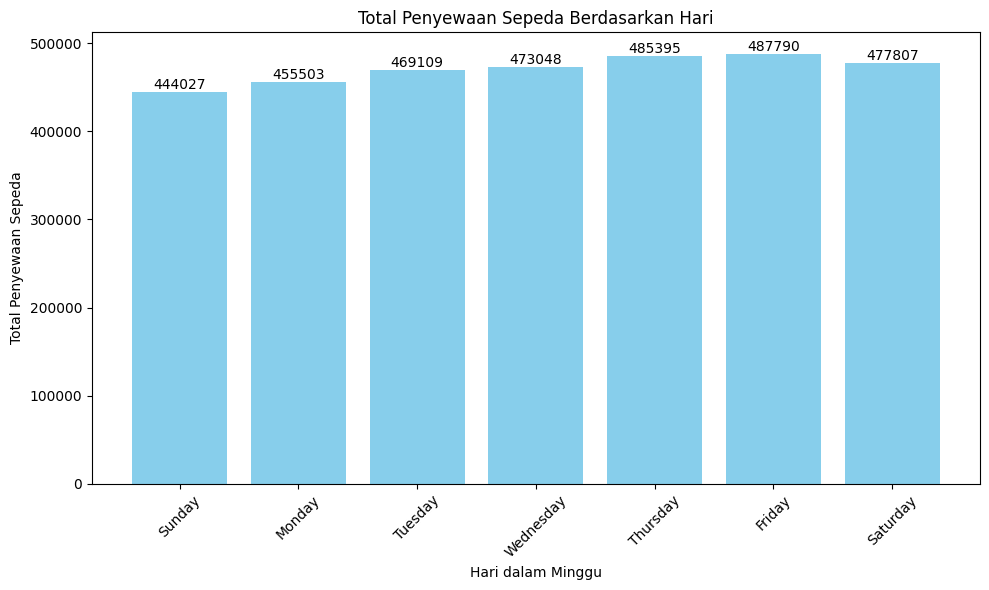

In [20]:
# Kelompokkan dan urutkan berdasarkan total_rentals
day_rentals = day_df.groupby("day_of_week")["total_rentals"].sum()

# Membuat diagram batang
plt.figure(figsize=(10,6))
bars = plt.bar(day_rentals.index, day_rentals.values, color='skyblue')

# Menambahkan label jumlah di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontsize=10)

# Memberi label dan judul
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Total Penyewaan Sepeda Berdasarkan Hari')

# Menampilkan diagram
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
Kesimpulan dari data di atas menunjukkan bahwa penyewaan sepeda tertinggi terjadi pada hari Jumat, dengan 487,790 penyewaan, yang mengindikasikan aktivitas luar ruangan yang meningkat menjelang akhir pekan. Sementara itu, penyewaan sepeda terendah tercatat pada hari Minggu dengan 444,027 penyewaan, mungkin karena orang lebih memilih beristirahat atau melakukan kegiatan lain. Secara keseluruhan, hari kerja menjelang akhir pekan cenderung memiliki tingkat penyewaan yang lebih tinggi.

### Pertanyaan 2: Pada jam berapa saja terjadi penyewaan sepeda tertinggi dan terendah ?

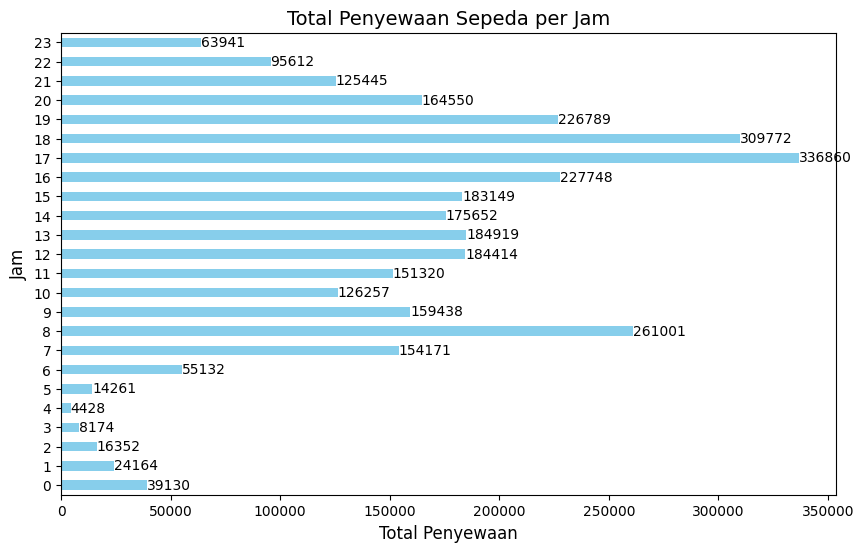

In [21]:
# Data yang dihasilkan oleh kode sebelumnya
hourly_rentals = hour_df.groupby("hour")["total_rentals"].sum()

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 6))
hourly_rentals.plot(kind='barh', color='skyblue')

# Menambahkan judul dan label
plt.title('Total Penyewaan Sepeda per Jam', fontsize=14)
plt.xlabel('Total Penyewaan', fontsize=12)
plt.ylabel('Jam', fontsize=12)

# Menambahkan label di ujung setiap batang
for index, value in enumerate(hourly_rentals):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

# Menampilkan diagram
plt.show()

**Insight:**
Pada jam 17:00 dan 18:00 terjadi penyewaan sepeda tertinggi, dengan masing-masing mencapai 336.860 dan 309.772 penyewaan, yang kemungkinan besar disebabkan oleh jam pulang kerja. Sebaliknya, penyewaan sepeda terendah terjadi pada pukul 03:00 dan 04:00, dengan hanya 8.174 dan 4.428 penyewaan, yang wajar karena waktu tersebut merupakan dini hari dengan aktivitas yang minim. Secara keseluruhan, tren menunjukkan dua puncak utama di pagi hari (sekitar pukul 08:00) dan sore hari (pukul 17:00 - 18:00), serta penurunan tajam pada malam hingga dini hari.

### Pertanyaan 3: Pada bulan apa saja terjadi penyewaan sepeda tertinggi dan terendah ?

<ipython-input-22-0f9b7f531c8c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals = day_df.groupby("month")["total_rentals"].sum()


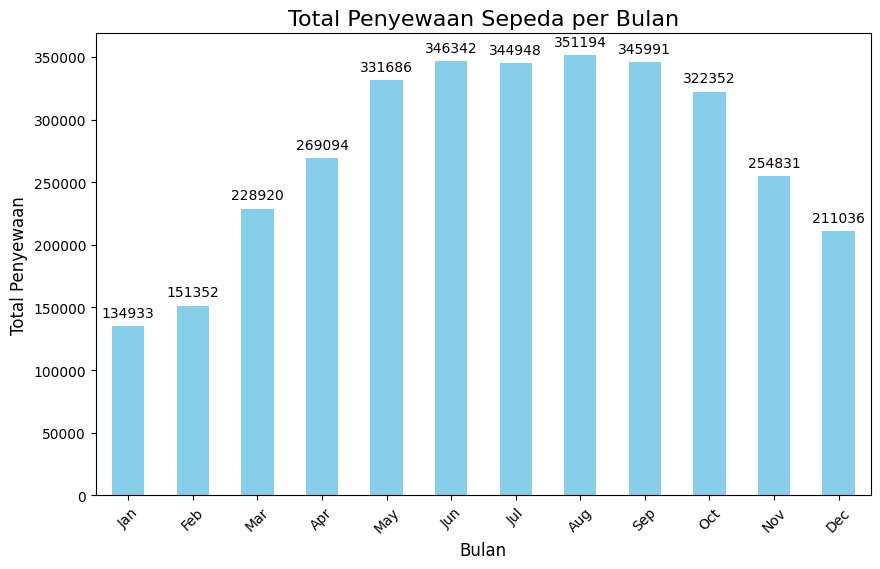

In [22]:
# Data per bulan
monthly_rentals = day_df.groupby("month")["total_rentals"].sum()

# Membuat diagram batang vertikal
plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='bar', color='skyblue')

# Menambahkan label dan judul
plt.title('Total Penyewaan Sepeda per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)

# Menambahkan label jumlah di atas batang
for i, value in enumerate(monthly_rentals):
    plt.text(i, value + 5000, str(value), ha='center', va='bottom', fontsize=10)

# Menampilkan diagram
plt.xticks(rotation=45)
plt.show()

**Insight:**
Berdasarkan data, bulan dengan penyewaan sepeda tertinggi adalah Agustus (351,194 penyewaan), sementara bulan dengan penyewaan sepeda terendah adalah Januari (134,933 penyewaan). Ini menunjukkan adanya fluktuasi musiman dalam penyewaan sepeda, di mana bulan-bulan dengan cuaca lebih hangat, seperti Agustus, mengalami jumlah penyewaan yang lebih tinggi, sedangkan pada bulan-bulan yang lebih dingin, seperti Januari, jumlah penyewaan cenderung menurun.

### Pertanyaan 4: Pada kondisi cuaca apa saja terjadi penyewaan sepeda tertinggi dan terendah ?

<ipython-input-23-f48f1e0f906f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = hour_df.groupby("weather_condition")["total_rentals"].sum()


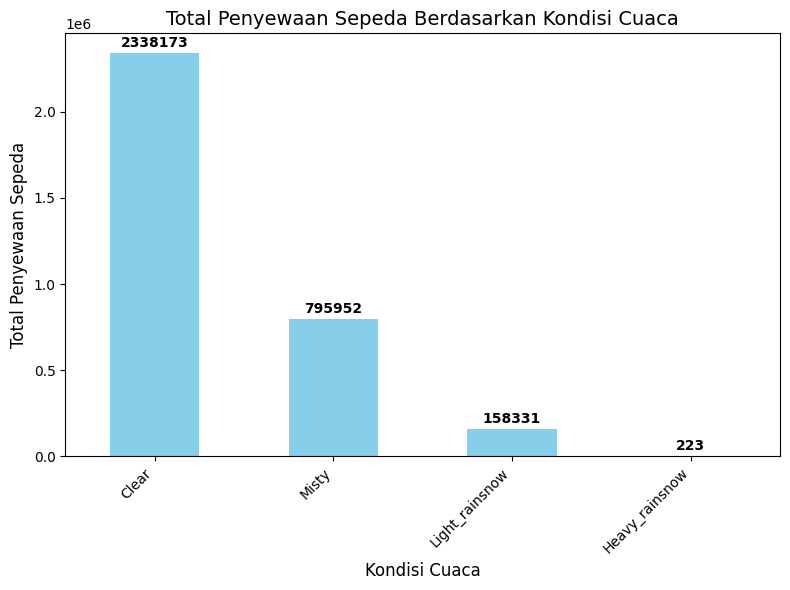

In [23]:
# Mengelompokkan data berdasarkan weather_condition
weather_rentals = hour_df.groupby("weather_condition")["total_rentals"].sum()

# Membuat diagram batang vertikal
plt.figure(figsize=(8, 6))
weather_rentals.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)

# Menambahkan jumlah penyewaan di atas batang
for i, value in enumerate(weather_rentals):
    plt.text(i, value + 20000, str(value), ha='center', va='bottom', fontweight='bold', color='black')

# Memutar label pada sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan diagram
plt.tight_layout()
plt.show()

**Insight:**
Dari data yang ada, dapat disimpulkan bahwa kondisi cuaca jelas mempengaruhi jumlah penyewaan sepeda. Kondisi cuaca Clear (cerah) mencatatkan jumlah penyewaan tertinggi dengan 2,338,173 penyewaan, menunjukkan bahwa cuaca cerah mendorong lebih banyak orang untuk menggunakan sepeda. Sebaliknya, kondisi cuaca Heavy_rainsnow (hujan lebat dan salju) memiliki jumlah penyewaan yang sangat rendah, hanya 223 penyewaan, yang menunjukkan bahwa cuaca buruk mengurangi minat orang untuk menyewa sepeda. Cuaca cerah cenderung meningkatkan aktivitas penyewaan, sementara kondisi cuaca buruk menurunkan jumlah penyewaan sepeda.

## Analisis Lanjutan : Clustering manual berdasarkan jam untuk menjawab pertanyaan 2
Mengubah jam ke dalam interval waktu dalam sehari dengan aturan:
- Dini Hari: 00:00 - 04:59
- Pagi: 05:00 - 10:59
- Siang: 11:00 - 14:59
- Sore: 15:00 - 17:59
- Malam: 18:00 - 23:59

time_of_day
Malam        986109
Pagi         770260
Sore         747757
Siang        696305
Dini Hari     92248
Name: total_rentals, dtype: int64


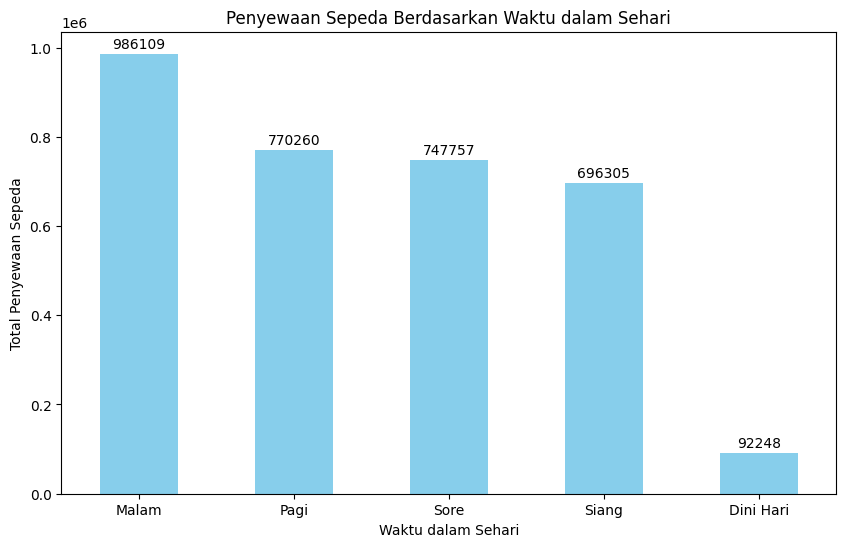

In [24]:
# Menggunakan data yang sudah dikelompokkan berdasarkan jam
hourly_rentals = hour_df.groupby("hour")["total_rentals"].sum().sort_values(ascending=False)

# Mengelompokkan data penyewaan sepeda per jam ke dalam kategori waktu
def get_time_of_day(hour):
    if 5 <= hour < 11:
        return 'Pagi'
    elif 11 <= hour < 15:
        return 'Siang'
    elif 15 <= hour < 18:
        return 'Sore'
    elif 18 <= hour < 24:
        return 'Malam'
    else:
        return 'Dini Hari'

# Mengubah data hourly_rentals menjadi DataFrame untuk manipulasi lebih lanjut
hour_df = pd.DataFrame({'hour': hourly_rentals.index, 'total_rentals': hourly_rentals.values})

# Menambahkan kolom 'time_of_day' berdasarkan jam
hour_df['time_of_day'] = hour_df['hour'].apply(get_time_of_day)

# Mengelompokkan data berdasarkan 'time_of_day' dan menjumlahkan total penyewaan sepeda
time_of_day_rentals = hour_df.groupby('time_of_day')['total_rentals'].sum()

# Urutkan dari tertinggi ke terendah
time_of_day_rentals = time_of_day_rentals.sort_values(ascending=False)

print(time_of_day_rentals)

# Visualisasi
ax = time_of_day_rentals.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Penyewaan Sepeda Berdasarkan Waktu dalam Sehari')
plt.xlabel('Waktu dalam Sehari')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=0)

# Menambahkan label di atas batang
for i, v in enumerate(time_of_day_rentals):
    ax.text(i, v + 5000, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

**Insight:**
Berdasarkan data di atas, penyewaan sepeda tertinggi terjadi pada jam Malam dengan total 986.109 penyewaan, yang kemungkinan besar terkait dengan aktivitas malam hari, seperti pulang kerja atau rekreasi malam. Sebaliknya, Dini Hari mencatatkan penyewaan sepeda terendah dengan hanya 92.248 penyewaan, yang wajar mengingat pada jam tersebut aktivitas sepeda sangat minim. Secara keseluruhan, penyewaan sepeda cenderung tinggi pada sore hingga malam hari, sementara rendah pada dini hari.

## Conclusion

Berdasarkan analisis data penyewaan sepeda, diperoleh beberapa insight penting yang dapat menjadi dasar pengambilan keputusan untuk optimasi layanan penyewaan sepeda:

1. Penyewaan Sepeda Berdasarkan Hari
   Penyewaan sepeda tertinggi tercatat pada hari Jumat dengan total 487.790 penyewaan, sedangkan penyewaan terendah terjadi pada hari Minggu dengan 444.027 penyewaan.
   - Insight:
     - Tingginya angka penyewaan di hari kerja, khususnya Jumat, kemungkinan besar dipengaruhi oleh aktivitas komuter yang menggunakan sepeda sebagai transportasi menuju kantor atau kampus.
     - Sebaliknya, rendahnya angka di hari Minggu dapat disebabkan oleh menurunnya aktivitas masyarakat dan lebih banyaknya waktu istirahat di akhir pekan.
   - Rekomendasi:
         - Fokuskan distribusi dan perawatan unit sepeda di hari kerja, terutama menjelang akhir minggu.
         - Manfaatkan hari Minggu untuk melakukan pemeliharaan berkala terhadap sepeda-sepeda.
     
2. Penyewaan Sepeda Berdasarkan Jam
   Puncak penyewaan terjadi pada pukul 17:00 dengan 336.860 penyewaan, dan paling rendah pada pukul 04:00 dengan hanya 4.428 penyewaan.

   - Insight:
     - Jam 17:00 merupakan jam pulang kerja/sekolah, menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi utama saat jam sibuk.
     - Aktivitas penyewaan yang sangat rendah pada pukul 04:00 dapat dikaitkan dengan waktu subuh di mana sebagian besar orang belum memulai aktivitas.
   - Rekomendasi:
     - Tambahkan ketersediaan sepeda di lokasi strategis (seperti stasiun atau perkantoran) menjelang jam sibuk (pagi dan sore hari).
     - Lakukan pemeliharaan sepeda di dini hari ketika tidak banyak peminjaman sepeda
       
3. Penyewaan Sepeda Berdasarkan Bulan
   Bulan Agustus mencatatkan penyewaan tertinggi dengan 351.194 penyewaan, sedangkan Januari adalah yang terendah dengan 134.933 penyewaan.

   - Insight:
     - Musim panas seperti di bulan Agustus cenderung mendukung aktivitas luar ruangan, termasuk bersepeda.
     - Cuaca yang lebih dingin dan curah hujan yang tinggi pada bulan Januari dapat menurunkan minat masyarakat untuk bersepeda.
   - Rekomendasi:
     - Lakukan kampanye promosi penyewaan saat musim panas.
     - Tawarkan insentif atau promo musiman untuk mendorong penyewaan di musim dingin.

4. Penyewaan Sepeda Berdasarkan Kondisi Cuaca
   Kondisi cuaca cerah (Clear) memiliki total penyewaan tertinggi sebesar 2.338.173 penyewaan, sedangkan hujan lebat dan salju (Heavy_rainsnow) hanya mencatatkan 223 penyewaan.
   - Insight:
     - Cuaca sangat mempengaruhi minat pengguna dalam menyewa sepeda. Pada cuaca ekstrem, penyewaan hampir berhenti sepenuhnya.
     - Penggunaan sepeda lebih diminati saat cuaca mendukung.
   - Rekomendasi:
     - Kembangkan sistem informasi cuaca pada aplikasi penyewaan untuk memberikan rekomendasi waktu terbaik bersepeda.
     - Sediakan layanan perlindungan tambahan (seperti jas hujan atau pelindung) saat cuaca tidak menentu.

Data menunjukkan bahwa waktu, musim, dan cuaca memainkan peran penting dalam perilaku penyewaan sepeda. Dengan memahami pola-pola ini, penyedia layanan dapat meningkatkan pengalaman pengguna, mengoptimalkan distribusi sepeda, dan merancang strategi pemasaran yang lebih efektif. Insight ini juga dapat berguna untuk pengembangan kebijakan transportasi ramah lingkungan di kota.